Testing insertion_sort2 with input size 16384: 100%|██████████| 10/10 [00:47<00:00,  4.72s/it]


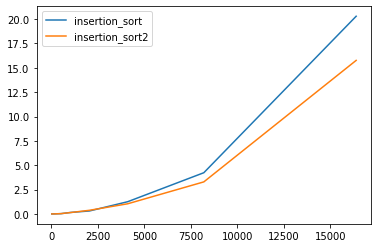

Algorythm times:
insertion_sort: [0.0, 0.0, 0.0, 0.0029900074005126953, 0.027924060821533203, 0.15059590339660645, 0.3051776885986328, 1.252650499343872, 4.230685234069824, 20.298936367034912]
insertion_sort2: [0.0, 0.000997781753540039, 0.0, 0.000997304916381836, 0.0299227237701416, 0.13962674140930176, 0.37400007247924805, 1.0402164459228516, 3.289569139480591, 15.76584005355835]


<Figure size 432x288 with 0 Axes>

In [6]:
from typing import List, Callable, Iterable, Any
import time
from copy import deepcopy


from numpy.random import randint
import matplotlib.pyplot as plt
from tqdm import tqdm

def insertion_sort(A: Iterable[Any], n: int) -> None:
    for j in range(1, n):
        key = A[j]
        i = j - 1
        while i >= 0 and A[i] > key:
            A[i+1] = A[i]
            i -= 1
        A[i+1] = key

def insertion_sort2(A: Iterable[Any], n: int) -> None:
    for j in range(1, n):
        key = A[j]
        breaked = False
        for i in range(j-1, -1, -1):
            if A[i] <= key:
                breaked = True
                break
            A[i+1] = A[i]
        if not breaked:
            i -= 1
        A[i+1] = key
        
def test_and_comapre_algorythms(algorythms: List[Callable],
                                input_sizes: List[int],
                                min_el: int, max_el: int) -> None:
    """
    Args:
        algorythms: a list of functions to test
        input_sizes: a list of input sizes
    Plots the time it took to run each algorythm for each input size.
    """
    
    algo2times = {algo: [] for algo in algorythms}
    pbar = tqdm(input_sizes)
    for size in pbar:
        A_not_sorted = list(randint(min_el, max_el, size))
        for algorythm in algorythms:
            pbar.set_description(f"Testing {algorythm.__name__} with input size {size}")
            A = deepcopy(A_not_sorted)
            start = time.time()
            algorythm(A, size)
            end = time.time()
            if A != sorted(A_not_sorted):
                print(f"initial array: {A_not_sorted}")
                print(f"algorytm result: {A}")
                print(f"correct result: {sorted(A_not_sorted)}")
                raise ValueError(f"Algorythm {algorythm.__name__} failed to sort an array")
            algo2times[algorythm].append(end - start)

    for algo, times in algo2times.items():
        plt.plot(input_sizes, times, label=algo.__name__)
    plt.legend()
    plt.show()
    plt.savefig("algorythm_time_comaprison.png")

    print("Algorythm times:")
    for algo, times in algo2times.items():
        print(f"{algo.__name__}: {times}")


if __name__ == "__main__":
    test_and_comapre_algorythms(
        [insertion_sort, insertion_sort2],
        # [16, 32, 64, 128, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536], 0, 100)
        [16, 32, 64, 128, 512, 1024, 2048, 4096, 8192, 16384], 0, 100)


In [17]:
import numpy as np
min_el = 0
max_el = 100
size = 16
a = randint(min_el, max_el, size)
l = list(map(str, a))

In [20]:
input_sizes = [16, 32, 64, 128, 512, 1024, 2048, 4096, 8192, 16384]

In [21]:
import os
def generate_tests(input_sizes: List[int], min_el: int, max_el: int) -> None:
    for i, input_size in enumerate(input_sizes):
        with open(os.path.join("tests", f"test{i}.txt"), "w") as f:
            f.write(f"{input_size}\n")
            A = randint(min_el, max_el, input_size)
            f.write("\n".join(map(str, A)))
            

In [22]:
generate_tests(input_sizes, 0, 100)